In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv


In [2]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [3]:
path = '/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv'
df = pd.read_csv(path)

In [4]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


We need to convert strings to number type

In [6]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first = True)

In [7]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


In [8]:
y = df['Exited']
x = df.drop('Exited',axis=1)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)

# RandomForest Classifier

In [10]:
rf = RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.8696666666666667

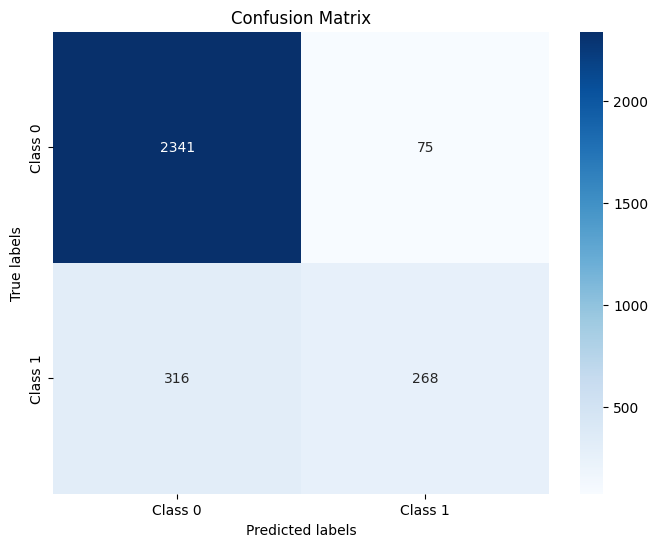

In [11]:

rf_y_pred = rf_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# DecisionTree Classifier

In [12]:
dc = DecisionTreeClassifier()
dc_model = dc.fit(x_train,y_train)
dc_model.score(x_test,y_test)

0.8026666666666666

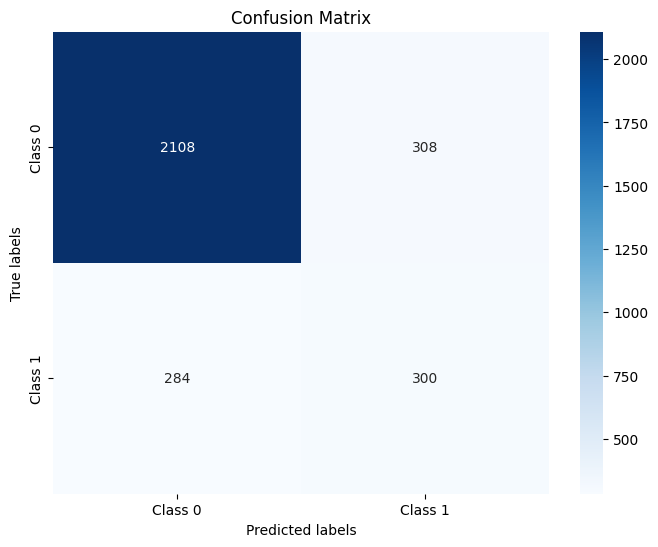

In [13]:

dc_y_pred = dc_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, dc_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()